In [26]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [15]:
with open('mar27_1523.txt', 'r') as myfile:
    data = myfile.read().splitlines()

In [16]:
training_dict = {}
testing_dict = {}
for i in range(len(data)):
    if 'training' in data[i]:
        stats = data[i].split('|')
        epoch_num = stats[1]
        gpu_id = stats[2]
        metric = stats[3]
        value = stats[4]
        if epoch_num not in training_dict.keys():
            training_dict[epoch_num] = {}
        if metric not in training_dict[epoch_num].keys():
            training_dict[epoch_num][metric] = []
        
        training_dict[epoch_num][metric].append(value)
        
    elif 'testing' in data[i]:
        
        stats = data[i].split('|')
        epoch_num = stats[1]
        gpu_id = stats[2]
        metric = stats[3]
        value = stats[4]
        if epoch_num not in testing_dict.keys():
            testing_dict[epoch_num] = {}
        if metric not in testing_dict[epoch_num].keys():
            testing_dict[epoch_num][metric] = []
        
        testing_dict[epoch_num][metric].append(value)
    

In [17]:
OverallStats_train = {}
for key in training_dict.keys():
    sub = training_dict[key]
    if key not in OverallStats_train.keys():
        OverallStats_train[key] = {}
    for subkey in sub.keys():
        summer = sum(list(map(float,sub[subkey])))
        n = len(sub[subkey])
        header = f'Average {subkey}'
        avg = summer / n
        
        OverallStats_train[key][header] = avg
        

In [18]:
OverallStats_test = {}
for key in testing_dict.keys():
    sub = testing_dict[key]
    if key not in OverallStats_test.keys():
        OverallStats_test[key] = {}
    for subkey in sub.keys():
        summer = sum(list(map(float,sub[subkey])))
        n = len(sub[subkey])
        header = f'Average {subkey}'
        avg = summer / n
        
        OverallStats_test[key][header] = avg

In [23]:
pd.set_option('display.max_rows', None)
x = pd.DataFrame.from_dict(OverallStats_train).T
x

,Average Overall Mean Squared Error,Average Left Mean Squared Error,Average Right Mean Squared Error,Average Mean Absolute Error,Average Mean Absolute Error Left,Average Mean Absolute Error Right,Average Overall Accuracy,Average Overall Accuracy Left,Average Accuracy Right,Average Binary Accuracy,Average Binary Accuracy Left,Average Binary Accuracy Right
1,2.112492,2.501523,1.723461,1.158017,1.279401,1.036632,0.000000,0.166667,0.333333,0.166667,0.416667,0.416667
2,1.865475,2.405668,1.325283,1.189391,1.388370,0.990412,0.000000,0.083333,0.333333,0.083333,0.500000,0.416667
3,0.953376,0.857479,1.049273,0.843027,0.823016,0.863037,0.166667,0.250000,0.416667,0.333333,0.500000,0.500000
4,0.903796,0.966016,0.841576,0.819528,0.836714,0.802341,0.250000,0.416667,0.250000,0.250000,0.500000,0.416667
5,0.864882,1.166201,0.563563,0.763303,0.885448,0.641157,0.083333,0.333333,0.416667,0.416667,0.500000,0.583333
6,0.674860,0.491067,0.858653,0.676638,0.632277,0.720999,0.166667,0.333333,0.416667,0.333333,0.500000,0.500000
7,1.178944,1.398381,0.959507,0.819233,0.896153,0.742314,0.250000,0.416667,0.583333,0.333333,0.583333,0.583333
8,1.483783,1.250785,1.716780,0.900781,0.966729,0.834833,0.083333,0.166667,0.500000,0.166667,0.333333,0.583333
9,0.619478,0.701156,0.537801,0.680468,0.740179,0.620758,0.166667,0.250000,0.500000,0.250000,0.333333,0.750000
10,0.857107,0.619477,1.094737,0.766816,0.674524,0.859109,0.166667,0.333333,0.250000,0.333333,0.500000,0.666667


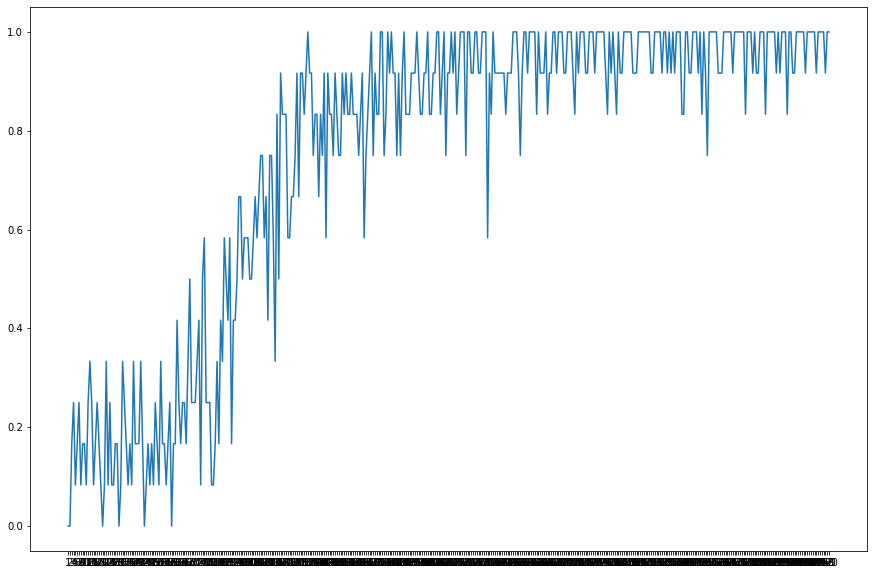

In [34]:
plt.figure(figsize=(15,10))
plt.plot(x['Average Overall Accuracy'])


In [22]:
pd.DataFrame.from_dict(OverallStats_test).T

,Average Overall Mean Squared Error,Average Left Mean Squared Error,Average Right Mean Squared Error,Average Mean Absolute Error,Average Mean Absolute Error Left,Average Mean Absolute Error Right,Average Overall Accuracy,Average Overall Accuracy Left,Average Accuracy Right,Average Binary Accuracy,Average Binary Accuracy Left,Average Binary Accuracy Right
1,2.197448,3.169859,1.225038,1.309400,1.649258,0.969541,0.00,0.00,0.50,0.25,0.50,0.75
2,1.926410,2.332490,1.520330,1.309106,1.456144,1.162068,0.00,0.00,0.00,0.25,0.50,0.75
3,1.810912,1.777516,1.844308,1.272374,1.263117,1.281632,0.00,0.00,0.00,0.25,0.50,0.75
4,1.878465,1.539900,2.217029,1.246423,1.109863,1.382983,0.00,0.25,0.00,0.25,0.50,0.75
5,2.153236,1.495485,2.810987,1.277167,1.042904,1.511430,0.00,0.25,0.25,0.25,0.50,0.25
6,2.140437,1.519165,2.761709,1.251513,0.999787,1.503240,0.00,0.25,0.25,0.25,0.50,0.25
7,1.910397,1.562391,2.258403,1.196310,1.000289,1.392330,0.00,0.25,0.00,0.25,0.50,0.75
8,1.581369,1.586154,1.576585,1.092917,0.999127,1.186707,0.00,0.25,0.00,0.25,0.50,0.75
9,1.423119,1.592885,1.253354,1.001926,0.997986,1.005865,0.00,0.25,0.00,0.25,0.50,0.75
10,1.407944,1.630949,1.184939,0.949144,0.997087,0.901201,0.25,0.25,0.50,0.25,0.50,0.75


Timing Data

In [157]:
time_dic = {}
numref = {}
for i in range(len(data)):
    if 'TIME' in data[i]:
        stats = data[i].split(':')
        if 'CONVLAYER' in stats[0]:
            if 'CONVLAYER' in time_dic.keys():
                time_dic['CONVLAYER'] += stats[1]
                numref['CONVLAYER'] += 1
            else:
                time_dic['CONVLAYER'] = stats[1]
                numref['CONVLAYER'] = 1
        elif 'EMBEDDINGBLOCK' in stats[0]:
            if 'EMBEDDINGBLOCK' in time_dic.keys():
                time_dic['EMBEDDINGBLOCK'] += stats[1]
                numref['EMBEDDINGBLOCK'] += 1
            else:
                time_dic['EMBEDDINGBLOCK'] = stats[1]
                numref['EMBEDDINGBLOCK'] = 1
        elif 'LOCAL ENCODER BLOCK' in stats[0]:
            if 'LOCAL ENCODER BLOCK' in time_dic.keys():
                time_dic['LOCAL ENCODER BLOCK'] += stats[1]
                numref['LOCAL ENCODER BLOCK'] += 1
            else:
                time_dic['LOCAL ENCODER BLOCK'] = stats[1]
                numref['LOCAL ENCODER BLOCK'] = 1
        elif 'VISUAL TRANSFORMER' in stats[0]:
            if 'VISUAL TRANSFORMER' in time_dic.keys():
                time_dic['VISUAL TRANSFORMER'] += stats[1]
                numref['VISUAL TRANSFORMER'] += 1
            else:
                time_dic['VISUAL TRANSFORMER'] = stats[1]
                numref['VISUAL TRANSFORMER'] = 1
        elif 'GLOBALENCODER' in stats[0]:
            if 'GLOBALENCODER' in time_dic.keys():
                time_dic['GLOBALENCODER'] += stats[1]
                numref['GLOBALENCODER'] += 1
            else:
                time_dic['GLOBALENCODER'] = stats[1]
                numref['GLOBALENCODER'] = 1
        elif 'GLOBAL TRANSFORMER' in stats[0]:
            if 'GLOBAL TRANSFORMER' in time_dic.keys():
                time_dic['GLOBAL TRANSFORMER'] += stats[1]
                numref['GLOBAL TRANSFORMER'] += 1
            else:
                time_dic['GLOBAL TRANSFORMER'] = stats[1]
                numref['GLOBAL TRANSFORMER'] = 1

In [154]:
def get_time_stamp(key):
    rm = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    acc = 0
    num = 0
    for i in time_dic[key].split(' ')[1:]:
        for char in rm:
            i = i.replace(char,'')
        if i != '':
            acc += float(i)
            num += 1
    return acc/num

In [155]:
overall_time_dic = {}
for key in time_dic.keys():
    print(key)
    overall_time_dic[key] = get_time_stamp(key)

CONVLAYER
EMBEDDINGBLOCK
LOCAL ENCODER BLOCK
VISUAL TRANSFORMER
GLOBAL TRANSFORMER


In [156]:
overall_time_dic

{'CONVLAYER': -0.0032078102045868103,
 'EMBEDDINGBLOCK': -1.9319258893879947,
 'LOCAL ENCODER BLOCK': -0.0046704158207522715,
 'VISUAL TRANSFORMER': -1.9413452296057443,
 'GLOBAL TRANSFORMER': -0.04610867134966433}

In [158]:
time_dic['GLOBALENCODER'].split('-')

['',
 '0.0019228458404541016',
 '0.0016338825225830078',
 '0.0015988349914550781',
 '0.0011882781982421875',
 '0.0019505023956298828',
 '0.001279592514038086',
 '0.0014736652374267578',
 '0.0017745494842529297',
 '0.0015048980712890625',
 '0.0011715888977050781',
 '0.0007808208465576172',
 '0.000762939453125',
 '0.0010991096496582031',
 '0.0007269382476806641',
 '0.0010993480682373047',
 '0.0007574558258056641',
 '0.0011310577392578125',
 '0.0007622241973876953',
 '0.0011105537414550781',
 '0.0007731914520263672',
 '0.0008602142333984375',
 '0.0008053779602050781',
 '0.0008227825164794922',
 '0.0008454322814941406',
 '0.0008139610290527344',
 '0.0007941722869873047',
 '0.0007352828979492188',
 '0.0007450580596923828',
 '0.0007472038269042969',
 '0.000728607177734375',
 '0.000820159912109375',
 '0.0007233619689941406',
 '0.0007312297821044922',
 '0.0007522106170654297',
 '0.000732421875',
 '0.0007648468017578125',
 '0.0007307529449462891',
 '0.0007226467132568359',
 '0.00090694427490234